In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | tallahassee
Processing Record 3 of Set 1 | kuusamo
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | belle fourche
Processing Record 6 of Set 1 | saint-pierre
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | norman wells
Processing Record 9 of Set 1 | minden
Processing Record 10 of Set 1 | nichinan
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | marzuq
Processing Record 14 of Set 1 | provideniya
Processing Record 15 of Set 1 | puro
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | chokurdakh
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | ponta do sol
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | arraial do cabo
Processing Record 23 of S

Processing Record 38 of Set 4 | lusambo
Processing Record 39 of Set 4 | ferkessedougou
Processing Record 40 of Set 4 | yangjiang
Processing Record 41 of Set 4 | labuhan
Processing Record 42 of Set 4 | karamay
City not found. Skipping...
Processing Record 43 of Set 4 | khatanga
Processing Record 44 of Set 4 | ardistan
City not found. Skipping...
Processing Record 45 of Set 4 | coquimbo
Processing Record 46 of Set 4 | kismayo
Processing Record 47 of Set 4 | bardiyah
Processing Record 48 of Set 4 | lompoc
Processing Record 49 of Set 4 | bako
Processing Record 50 of Set 4 | egvekinot
Processing Record 1 of Set 5 | ahipara
Processing Record 2 of Set 5 | banff
Processing Record 3 of Set 5 | thompson
Processing Record 4 of Set 5 | richards bay
Processing Record 5 of Set 5 | beyneu
Processing Record 6 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 7 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 8 of Set 5 | carnarvon
Processing Record 9 of Set 5 | uki

Processing Record 28 of Set 8 | sibut
Processing Record 29 of Set 8 | lagoa
Processing Record 30 of Set 8 | sokolka
Processing Record 31 of Set 8 | ayan
Processing Record 32 of Set 8 | longyearbyen
Processing Record 33 of Set 8 | yinchuan
Processing Record 34 of Set 8 | cayenne
Processing Record 35 of Set 8 | bubaque
Processing Record 36 of Set 8 | mazamari
Processing Record 37 of Set 8 | mangan
Processing Record 38 of Set 8 | lata
Processing Record 39 of Set 8 | inirida
Processing Record 40 of Set 8 | abingdon
Processing Record 41 of Set 8 | sabha
Processing Record 42 of Set 8 | suntar
Processing Record 43 of Set 8 | solovetskiy
City not found. Skipping...
Processing Record 44 of Set 8 | hithadhoo
Processing Record 45 of Set 8 | shizunai
Processing Record 46 of Set 8 | yunjinghong
City not found. Skipping...
Processing Record 47 of Set 8 | statesboro
Processing Record 48 of Set 8 | klaksvik
Processing Record 49 of Set 8 | hovd
Processing Record 50 of Set 8 | kaeo
Processing Record 1 o

Processing Record 17 of Set 12 | waterloo
Processing Record 18 of Set 12 | souillac
Processing Record 19 of Set 12 | hov
Processing Record 20 of Set 12 | bambanglipuro
Processing Record 21 of Set 12 | machali
Processing Record 22 of Set 12 | fengrun
Processing Record 23 of Set 12 | afmadu
City not found. Skipping...
Processing Record 24 of Set 12 | portland
Processing Record 25 of Set 12 | srednekolymsk
Processing Record 26 of Set 12 | noumea
Processing Record 27 of Set 12 | a
City not found. Skipping...
Processing Record 28 of Set 12 | malgrat de mar
Processing Record 29 of Set 12 | sortavala
Processing Record 30 of Set 12 | minot
Processing Record 31 of Set 12 | teplodar
Processing Record 32 of Set 12 | barentsburg
City not found. Skipping...
Processing Record 33 of Set 12 | bay roberts
Processing Record 34 of Set 12 | port moresby
Processing Record 35 of Set 12 | kumluca
Processing Record 36 of Set 12 | terney
Processing Record 37 of Set 12 | aranos
Processing Record 38 of Set 12 | 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,35.60,93,40,5.82,CL,2020-08-01 13:34:42
1,Tallahassee,30.44,-84.28,80.60,88,75,5.82,US,2020-08-01 13:37:34
2,Kuusamo,65.97,29.18,62.60,48,40,10.29,FI,2020-08-01 13:40:26
3,Hilo,19.73,-155.09,73.40,78,90,4.70,US,2020-08-01 13:35:41
4,Belle Fourche,44.67,-103.85,64.00,61,0,1.01,US,2020-08-01 13:40:26
5,Saint-Pierre,-21.34,55.48,73.40,73,90,20.80,RE,2020-08-01 13:34:47
6,Saint-Philippe,-21.36,55.77,73.40,73,90,20.80,RE,2020-08-01 13:35:17
7,Norman Wells,65.28,-126.83,62.60,77,40,8.05,CA,2020-08-01 13:35:41
8,Minden,52.28,8.92,79.00,69,100,3.36,DE,2020-08-01 13:40:27
9,Nichinan,31.60,131.37,78.58,83,74,3.96,JP,2020-08-01 13:40:27


In [11]:
new_coloum_order =["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness",  "Wind Speed"]
city_data_df = city_data_df[new_coloum_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2020-08-01 13:34:42,-53.15,-70.92,35.6,93,40,5.82
1,Tallahassee,US,2020-08-01 13:37:34,30.44,-84.28,80.6,88,75,5.82
2,Kuusamo,FI,2020-08-01 13:40:26,65.97,29.18,62.6,48,40,10.29
3,Hilo,US,2020-08-01 13:35:41,19.73,-155.09,73.4,78,90,4.70
4,Belle Fourche,US,2020-08-01 13:40:26,44.67,-103.85,64.0,61,0,1.01


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1596289304.6682994

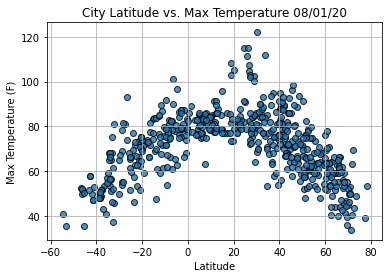

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

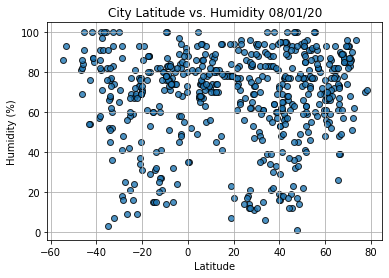

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

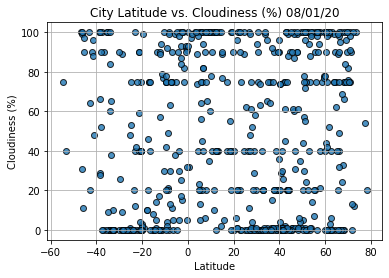

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

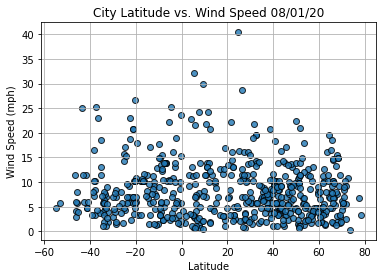

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                  Provideniya
Country                        RU
Date          2020-08-01 13:35:09
Lat                         64.38
Lng                        -173.3
Max Temp                    43.93
Humidity                       78
Cloudiness                      0
Wind Speed                   6.98
Name: 13, dtype: object

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Tallahassee,US,2020-08-01 13:37:34,30.44,-84.28,80.60,88,75,5.82
2,Kuusamo,FI,2020-08-01 13:40:26,65.97,29.18,62.60,48,40,10.29
3,Hilo,US,2020-08-01 13:35:41,19.73,-155.09,73.40,78,90,4.70
4,Belle Fourche,US,2020-08-01 13:40:26,44.67,-103.85,64.00,61,0,1.01
7,Norman Wells,CA,2020-08-01 13:35:41,65.28,-126.83,62.60,77,40,8.05
...,...,...,...,...,...,...,...,...,...
558,Teya,RU,2020-08-01 13:41:42,60.38,92.63,63.70,61,100,2.98
560,Shubarshi,KZ,2020-08-01 13:41:43,48.59,57.19,93.51,14,6,2.80
562,Hobyo,SO,2020-08-01 13:41:43,5.35,48.53,80.47,68,13,32.06
563,Sheboygan,US,2020-08-01 13:40:02,43.73,-87.93,72.00,77,20,5.82


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

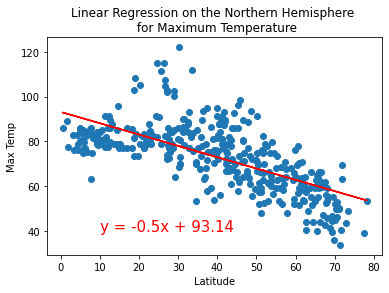

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

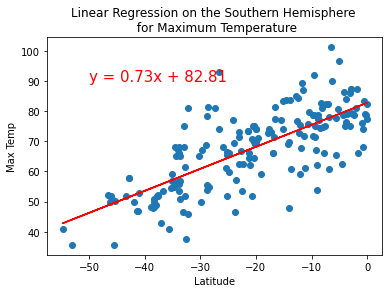

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

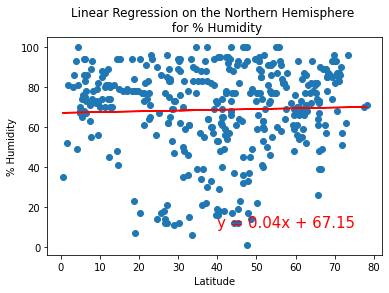

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

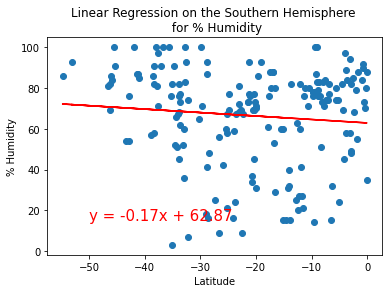

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

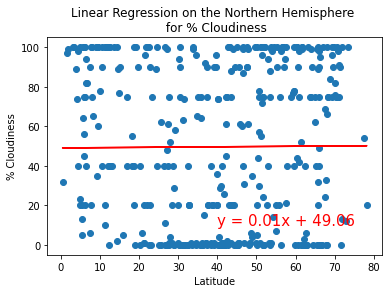

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

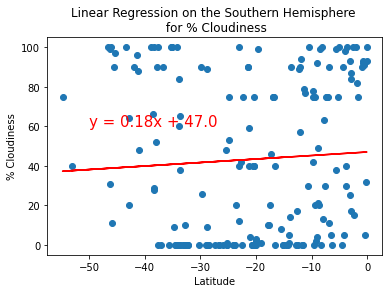

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

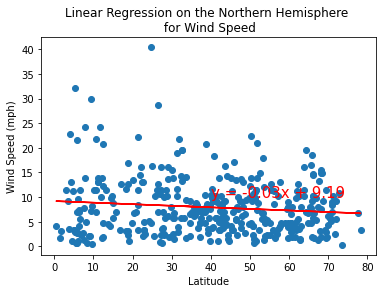

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(40,10))

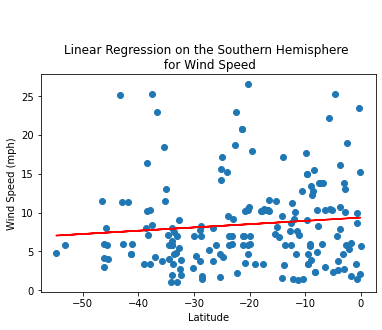

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)', (-50,35))